<a href="https://colab.research.google.com/github/madaam99/CoffeeRegression/blob/main/Coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ihelon/coffee-sales")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coffee-sales' dataset.
Path to dataset files: /kaggle/input/coffee-sales


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data1 = pd.read_csv(path + "/index_1.csv")
data2 = pd.read_csv(path + "/index_2.csv")

data1["machine"] = 1
data2["machine"] = 2

data = pd.concat([data1, data2], axis=0)
data.head()

,date,datetime,cash_type,card,money,coffee_name,machine
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,1
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,1
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,1


In [4]:
data['cash_type'].value_counts()

,count
cash_type,
card,3729
cash,169


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3898 entries, 0 to 261
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
 6   machine      3898 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 372.7+ KB


In [6]:
data.describe()

,money,machine
count,3898.00000,3898.000000
mean,31.38060,1.067214
std,5.06461,0.250424
min,15.00000,1.000000
25%,27.92000,1.000000
50%,32.82000,1.000000
75%,35.76000,1.000000
max,40.00000,2.000000


In [7]:
data['coffee_name'].value_counts()

,count
coffee_name,
Americano with Milk,824
Latte,806
Americano,593
Cappuccino,517
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,152
Americano with milk,44


In [8]:
data["coffee_name"] = data['coffee_name'].apply(lambda x: x.title())
data['coffee_name'].value_counts()

,count
coffee_name,
Americano With Milk,868
Latte,806
Americano,593
Cappuccino,517
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,152
Irish Whiskey,21


###EDA

In [9]:
coffeeByCard = data.groupby(["card", "coffee_name"]).size().reset_index(name="count").sort_values(by="count", ascending=False)
coffeeByCard

,card,coffee_name,count
220,ANON-0000-0000-0141,Cortado,99
418,ANON-0000-0000-0276,Americano With Milk,63
23,ANON-0000-0000-0012,Americano,48
731,ANON-0000-0000-0507,Latte,40
1577,ANON-0000-0000-1163,Americano,38
...,...,...,...
11,ANON-0000-0000-0006,Hot Chocolate,1
12,ANON-0000-0000-0007,Americano With Milk,1
13,ANON-0000-0000-0008,Americano With Milk,1
14,ANON-0000-0000-0008,Cocoa,1


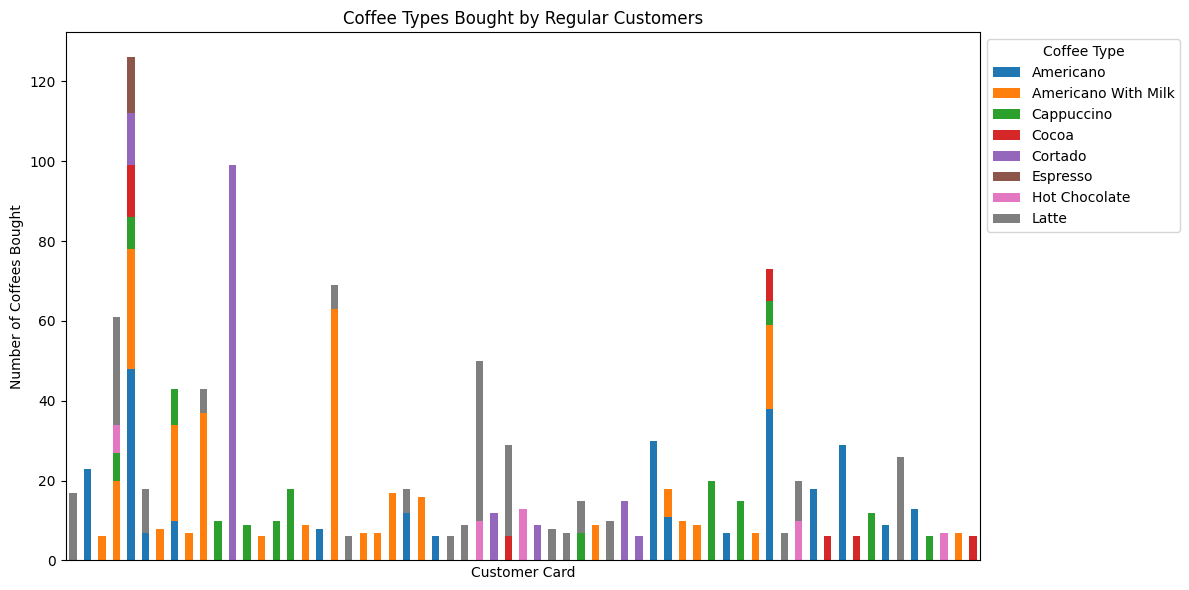

In [10]:
regularCustomer = coffeeByCard.loc[coffeeByCard["count"] > 5]

regularCustomer.pivot(index="card", columns="coffee_name", values="count").plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Customer Card")
plt.ylabel("Number of Coffees Bought")
plt.title("Coffee Types Bought by Regular Customers")
plt.xticks([])
plt.legend(title="Coffee Type", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

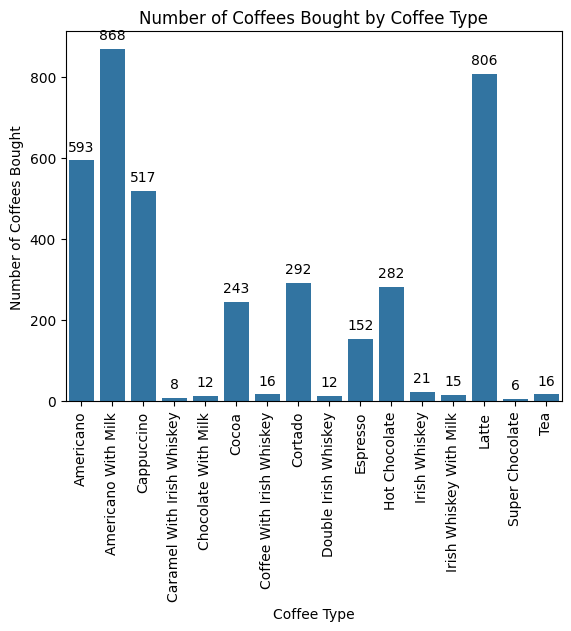

In [11]:
coffeeCount = data.groupby("coffee_name").size().reset_index(name="count")
coffeeCount = coffeeCount.loc[coffeeCount["count"] > 5]
coffeeCount

ax = sns.barplot(x=coffeeCount["coffee_name"], y=coffeeCount["count"])
plt.xticks(rotation=90)
plt.xlabel("Coffee Type")
plt.ylabel("Number of Coffees Bought")
plt.title("Number of Coffees Bought by Coffee Type")
for container in ax.containers:
    plt.bar_label(container, padding=5)
plt.show()

Finding the formats of columns "datetime"

In [12]:
import re

def normalize_numbers(val):
  return re.sub(r'\d+', 'NUM', val)

In [13]:
temp = data.copy()
temp["datetime"] = temp["datetime"].apply(normalize_numbers)
temp["datetime"].unique()

array(['NUM-NUM-NUM NUM:NUM:NUM.NUM', 'NUM-NUM-NUM NUM:NUM:NUM'],
      dtype=object)

Applying the findings to extract new features for EDA

In [14]:
timeData = data.copy()

timeData['date'] = pd.to_datetime(timeData['date'])
timeData["datetime"] = timeData["datetime"].apply(lambda x: x.split(".")[0])
timeData['datetime'] = pd.to_datetime(timeData['datetime'], format='%Y-%m-%d %H:%M:%S')

timeData["Month"] = timeData["date"].dt.month
timeData["Day"] = timeData["date"].dt.day
timeData["Hour"] = timeData["datetime"].dt.hour
timeData["Minute"] = timeData["datetime"].dt.minute
timeData["Year"] = timeData["date"].dt.year
timeData["Year_Month"] = timeData["date"].dt.to_period("M")
timeData["Week"] = timeData["date"].dt.to_period("W")
timeData

,date,datetime,cash_type,card,money,coffee_name,machine,Month,Day,Hour,Minute,Year,Year_Month,Week
0,2024-03-01,2024-03-01 10:15:50,card,ANON-0000-0000-0001,38.7,Latte,1,3,1,10,15,2024,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,3,1,12,19,2024,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,3,1,12,20,2024,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33,card,ANON-0000-0000-0003,28.9,Americano,1,3,1,13,46,2024,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14,card,ANON-0000-0000-0004,38.7,Latte,1,3,1,13,48,2024,2024-03,2024-02-26/2024-03-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2025-03-23,2025-03-23 14:55:46,cash,NaN,30.0,Cappuccino,2,3,23,14,55,2025,2025-03,2025-03-17/2025-03-23
258,2025-03-23,2025-03-23 15:15:36,card,NaN,25.0,Irish Whiskey,2,3,23,15,15,2025,2025-03,2025-03-17/2025-03-23
259,2025-03-23,2025-03-23 17:59:25,card,NaN,28.0,Super Chocolate,2,3,23,17,59,2025,2025-03,2025-03-17/2025-03-23
260,2025-03-23,2025-03-23 18:01:33,card,NaN,28.0,Vanilla With Irish Whiskey,2,3,23,18,1,2025,2025-03,2025-03-17/2025-03-23


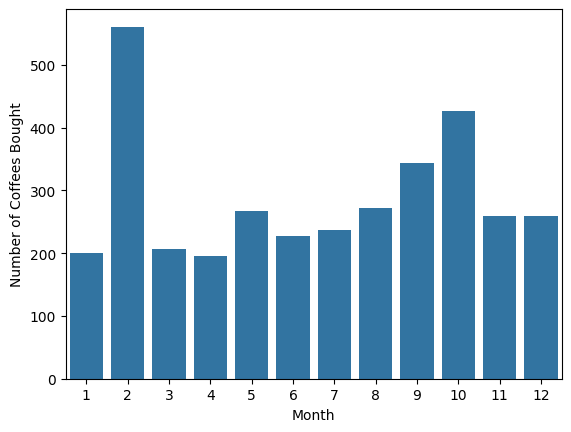

In [15]:
#Extracting dates for one year's time to reduce biased results
timeDataAll = timeData.copy()
timeData = timeData.loc[(timeData["date"] >= "2024-03-01") & (timeData["date"] < "2025-03-01")]

# However, important aspect to notice is that February contains values from 2 machines
dataByMonth = timeData.groupby("Month").agg({"money": ["sum", "count"]}).reset_index()
sns.barplot(x="Month", y=("money", "count"), data=dataByMonth)
plt.xlabel("Month")
plt.ylabel("Number of Coffees Bought")
plt.show()

Quick visualization of customer behaviour across vendor machine 1

In [16]:
ven1 = data1.copy()

ven1['date'] = pd.to_datetime(ven1['date'])
ven1["datetime"] = ven1["datetime"].apply(lambda x: x.split(".")[0])
ven1['datetime'] = pd.to_datetime(ven1['datetime'], format='%Y-%m-%d %H:%M:%S')

ven1["Month"] = ven1["date"].dt.month
ven1["Day"] = ven1["date"].dt.day
ven1["Hour"] = ven1["datetime"].dt.hour
ven1["Minute"] = ven1["datetime"].dt.minute
ven1

,date,datetime,cash_type,card,money,coffee_name,machine,Month,Day,Hour,Minute
0,2024-03-01,2024-03-01 10:15:50,card,ANON-0000-0000-0001,38.70,Latte,1,3,1,10,15
1,2024-03-01,2024-03-01 12:19:22,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,1,12,19
2,2024-03-01,2024-03-01 12:20:18,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,1,12,20
3,2024-03-01,2024-03-01 13:46:33,card,ANON-0000-0000-0003,28.90,Americano,1,3,1,13,46
4,2024-03-01,2024-03-01 13:48:14,card,ANON-0000-0000-0004,38.70,Latte,1,3,1,13,48
...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54,card,ANON-0000-0000-1158,35.76,Cappuccino,1,3,23,10,34
3632,2025-03-23,2025-03-23 14:43:37,card,ANON-0000-0000-1315,35.76,Cocoa,1,3,23,14,43
3633,2025-03-23,2025-03-23 14:44:16,card,ANON-0000-0000-1315,35.76,Cocoa,1,3,23,14,44
3634,2025-03-23,2025-03-23 15:47:28,card,ANON-0000-0000-1316,25.96,Americano,1,3,23,15,47


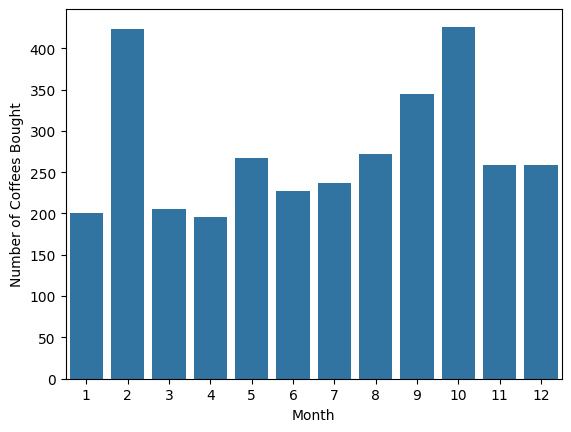

In [17]:
ven1 = ven1.loc[(ven1["date"] >= "2024-03-01") & (ven1["date"] < "2025-03-01")]

ven1MonthGroup = ven1.groupby("Month").size().reset_index(name="count")
sns.barplot(x="Month", y="count", data=ven1MonthGroup)
plt.xlabel("Month")
plt.ylabel("Number of Coffees Bought")
plt.show()

Continuing with combined data

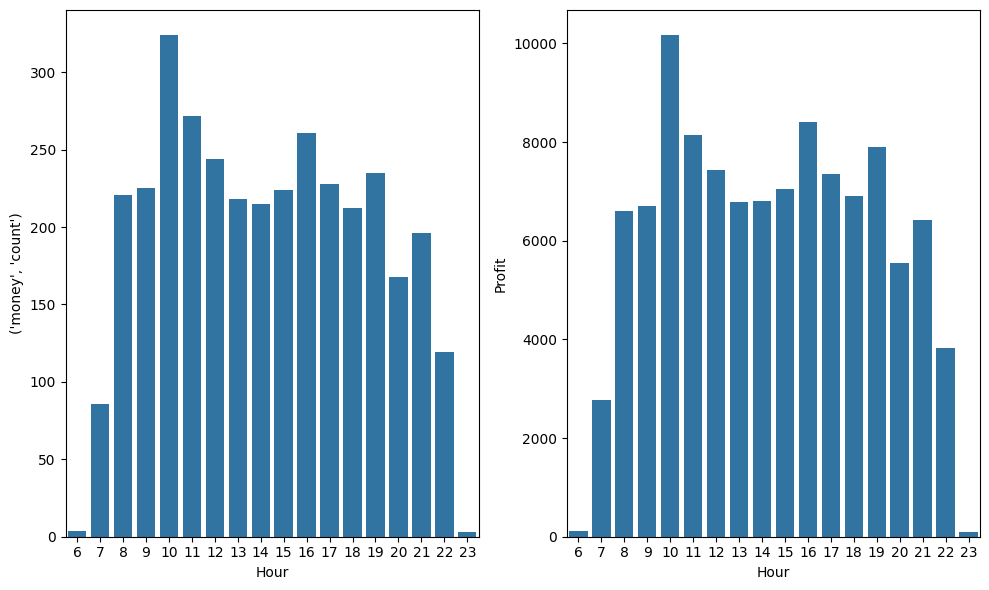

In [18]:
dataByHour = timeData.groupby("Hour").agg({"money": ["sum", "count"]}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(x="Hour", y=("money", "count"), data=dataByHour, ax=ax[0])
plt.xlabel("Hour")
plt.ylabel("Number of Coffees Bought")
sns.barplot(x="Hour", y=("money", "sum"), data=dataByHour, ax=ax[1])
plt.xlabel("Hour")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

In [19]:
profitByMonth = timeData.groupby("Year_Month")["money"].sum().reset_index()
profitByMonth

,Year_Month,money
0,2024-03,7050.20
1,2024-04,6720.56
2,2024-05,9063.42
3,2024-06,7758.76
4,2024-07,6915.94
5,2024-08,7613.84
6,2024-09,9988.64
7,2024-10,13891.16
8,2024-11,8590.54
9,2024-12,8237.74


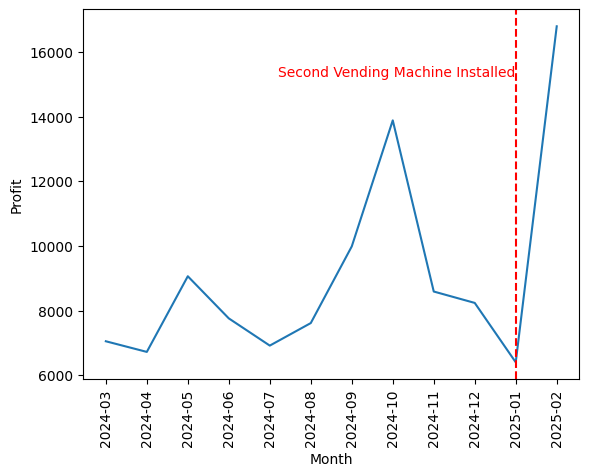

In [20]:
# Convert Year_Month to string for plotting
profitByMonth['Year_Month'] = profitByMonth['Year_Month'].astype(str)

ax = sns.lineplot(x="Year_Month", y="money", data=profitByMonth)
plt.xlabel("Month")
plt.ylabel("Profit")

# Find the index for the line to be placed at January 2025
line_position = profitByMonth[profitByMonth['Year_Month'] == '2025-01'].index[0]

plt.axvline(x=line_position, color="red", linestyle="--")
plt.text(line_position, plt.ylim()[1]*0.9, 'Second Vending Machine Installed', rotation=0, verticalalignment='top', horizontalalignment='right', color='red')
plt.xticks(rotation=90)
plt.show()

In [21]:
dataByWeek = timeData.groupby("Week").agg({"money": ["sum", "count"]}).reset_index()
dataByWeek.head()

Week   money      
                             sum count
0  2024-02-26/2024-03-03   973.5    28
1  2024-03-04/2024-03-10  1840.5    53
2  2024-03-11/2024-03-17  1516.3    47
3  2024-03-18/2024-03-24  1307.8    38
4  2024-03-25/2024-03-31  1412.1    40

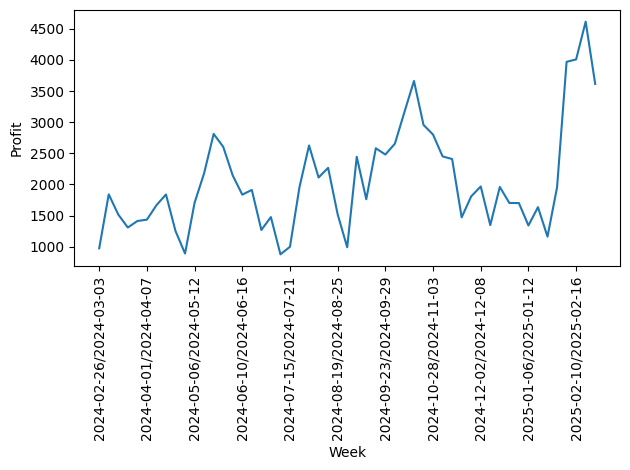

In [22]:
dataByWeek['Week'] = dataByWeek['Week'].astype(str)

# Access the 'sum' of 'money' using the MultiIndex
sns.lineplot(x="Week", y=('money', 'sum'), data=dataByWeek)
plt.xlabel("Week")
plt.ylabel("Profit")

n_weeks = len(dataByWeek['Week'])
tick_interval = n_weeks // 10
plt.xticks(range(0, n_weeks, tick_interval), dataByWeek['Week'][::tick_interval], rotation=90)

plt.tight_layout()
plt.show()

Now with all data

In [23]:
allWeek = timeDataAll.groupby(["Week", "machine"]).agg({"money": ["sum", "count"]}).reset_index()
allWeek.head()

Week machine   money      
                                     sum count
0  2024-02-26/2024-03-03       1   973.5    28
1  2024-03-04/2024-03-10       1  1840.5    53
2  2024-03-11/2024-03-17       1  1516.3    47
3  2024-03-18/2024-03-24       1  1307.8    38
4  2024-03-25/2024-03-31       1  1412.1    40

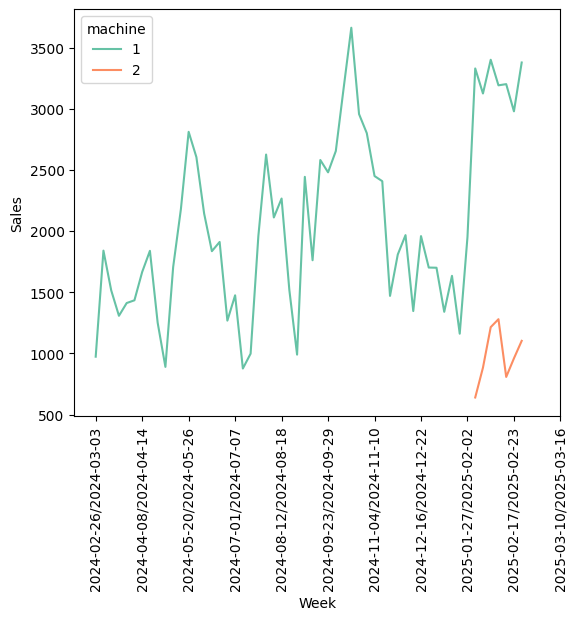

In [24]:
allWeek['Week'] = allWeek['Week'].astype(str)

sns.lineplot(x="Week", y=('money', 'sum'), data=allWeek, hue="machine", palette="Set2")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.tight_layout()

n_weeks = len(allWeek['Week'])
tick_interval = n_weeks // 10
plt.xticks(range(0, n_weeks, tick_interval), allWeek['Week'][::tick_interval], rotation=90)
plt.show()

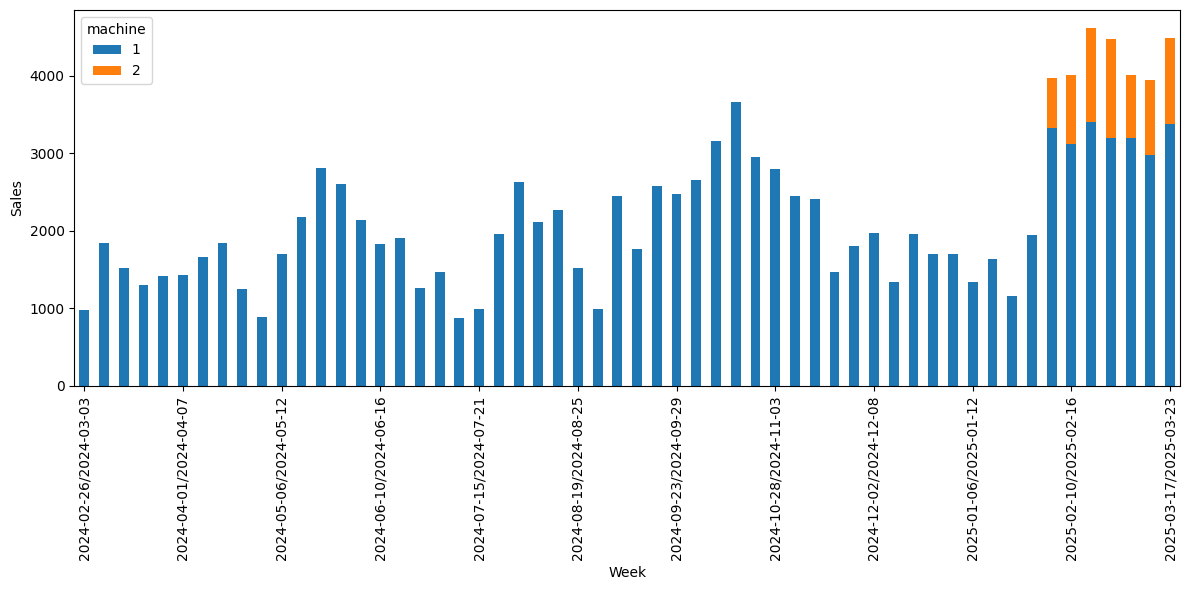

In [25]:
allWeek_pivot = allWeek.pivot(index='Week', columns='machine', values=('money', 'sum')).fillna(0)

allWeek_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Week")
plt.ylabel("Sales")

n_weeks = len(allWeek_pivot.index)
tick_interval = n_weeks // 10
plt.xticks(range(0, n_weeks, tick_interval), allWeek_pivot.index[::tick_interval], rotation=90)

plt.tight_layout()
plt.show()

In [26]:
allMonth = timeDataAll.groupby(["Year_Month", "machine"]).agg({"money": ["sum", "count"]}).reset_index()
allMonth.head()

Year_Month machine    money      
                          sum count
0    2024-03       1  7050.20   206
1    2024-04       1  6720.56   196
2    2024-05       1  9063.42   267
3    2024-06       1  7758.76   227
4    2024-07       1  6915.94   237

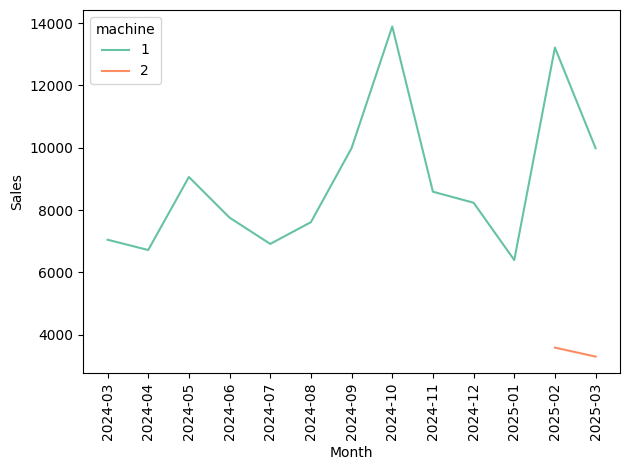

In [27]:
allMonth['Year_Month'] = allMonth['Year_Month'].astype(str)

sns.lineplot(x="Year_Month", y=('money', 'sum'), data=allMonth, hue="machine", palette="Set2")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

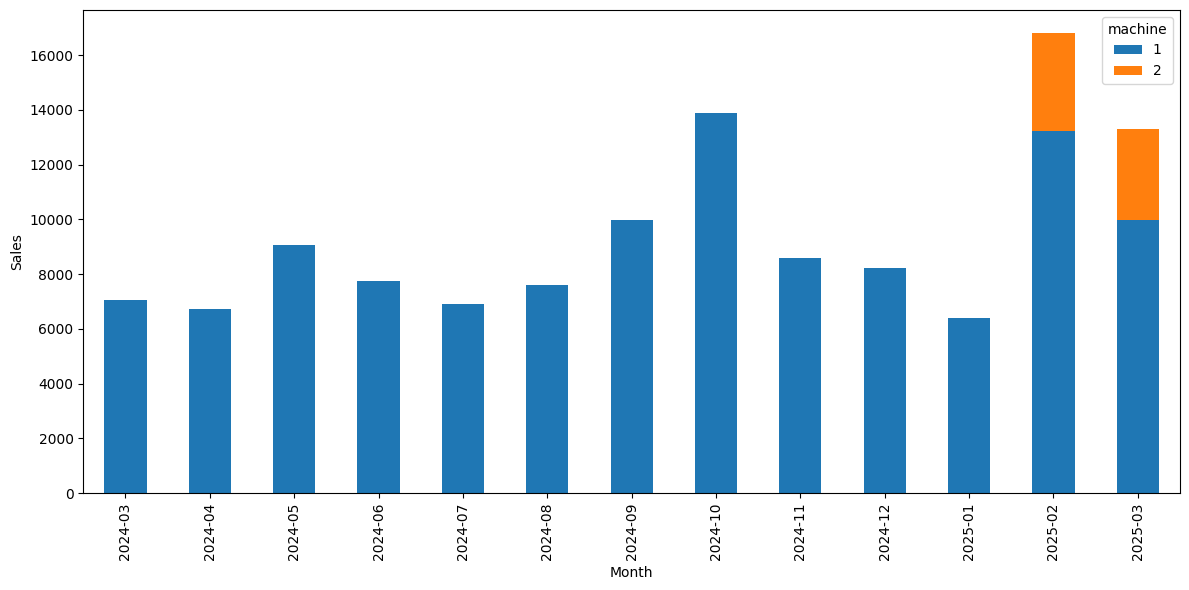

In [28]:
allMonth_pivot = allMonth.pivot(index='Year_Month', columns='machine', values=('money', 'sum')).fillna(0)

allMonth_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
timeRange = pd.date_range(start=timeDataAll['date'].min(), end=timeDataAll["date"].max())
timeDf = pd.DataFrame(timeRange, columns=["date"])

allDay = timeDataAll.groupby(["date", "machine"]).agg({"money": ["sum", "count"]}).reset_index()
allDay.columns = ["date", "machine", "money", "cups"]
allDayDf = pd.merge(allDay, timeDf, on="date", how="right")
allDayDf = allDayDf.fillna(0)
allDayDf.head()

,date,machine,money,cups
0,2024-03-01,1.0,396.3,11.0
1,2024-03-02,1.0,228.1,7.0
2,2024-03-03,1.0,349.1,10.0
3,2024-03-04,1.0,135.2,4.0
4,2024-03-05,1.0,338.5,9.0


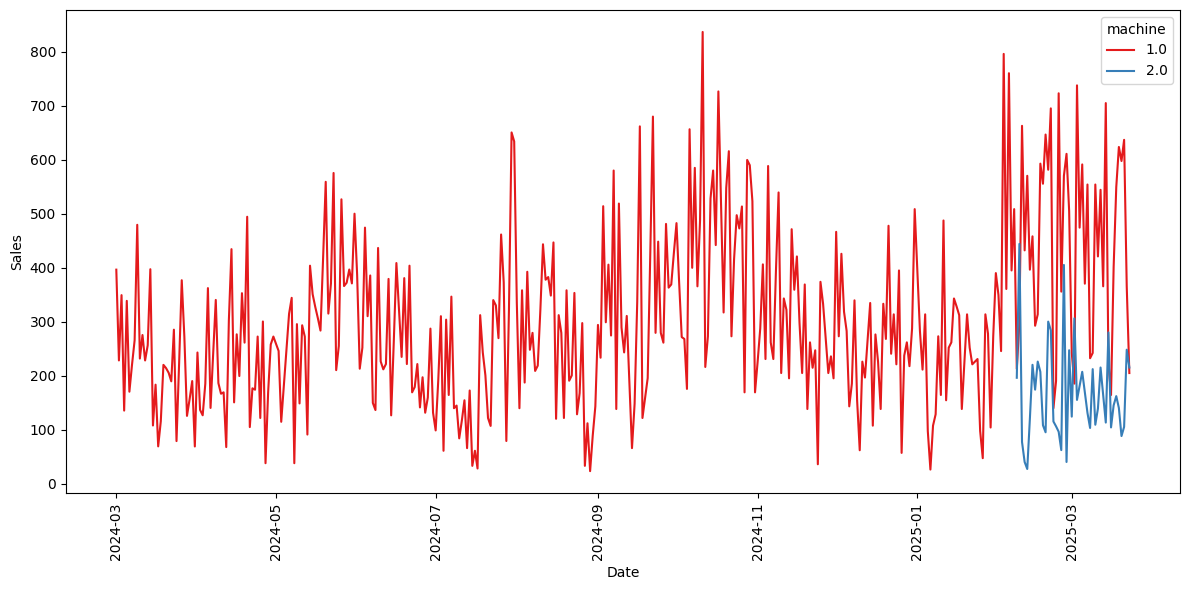

In [30]:
plt.figure(figsize=(12, 6))
# Filter out rows where 'machine' is 0
sns.lineplot(x="date", y="money", data=allDayDf[allDayDf['machine'] != 0], hue="machine", palette="Set1")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
timeDataAll['time'] = timeDataAll['datetime'].dt.floor('15min').dt.time
allHour = timeDataAll.groupby("time").agg({"money": ["count"]}).reset_index()
allHour.columns = ["time", "count"]

# Find the earliest time with data
start_dt = timeDataAll['time'].min()
end_dt = pd.to_datetime('23:45:00').time()

# Create a full range of time intervals using datetime objects and then extract the time
all_intervals = pd.DataFrame(
    np.unique(pd.date_range(
        start=pd.to_datetime(start_dt.strftime('%H:%M:%S')),
        end=pd.to_datetime('23:45:00'),
        freq='15min'
    ).time), columns=['time']
)

allHourDf = pd.merge(all_intervals, allHour, on='time', how='left').fillna(0)
allHourDf.head()

,time,count
0,06:45:00,5.0
1,07:00:00,10.0
2,07:15:00,7.0
3,07:30:00,22.0
4,07:45:00,60.0


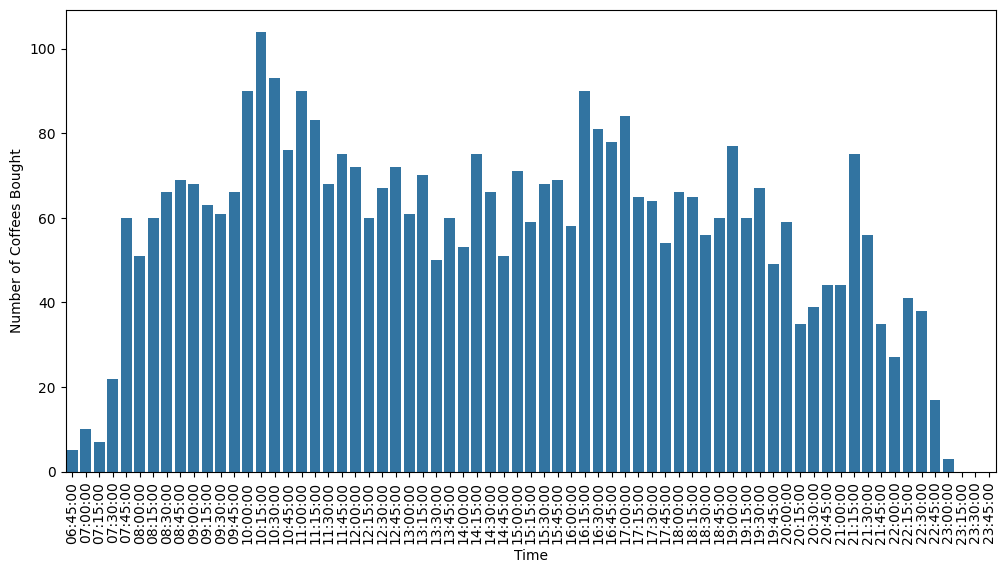

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x="time", y="count", data=allHourDf)
plt.xlabel("Time")
plt.ylabel("Number of Coffees Bought")
plt.xticks(rotation=90)
plt.show()

###Modelling

In [33]:
!pip install statsforecast utilsforecast mlforecast

In [34]:
from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsforecast import StatsForecast
from statsforecast.models import Naive, HistoricAverage, WindowAverage, SeasonalNaive, AutoARIMA
from mlforecast import MLForecast

from sklearn.linear_model import LinearRegression
import lightgbm as lgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
df = data.copy()

In [36]:
columnsToRename = {"date": "ds", "coffee_name": "unique_id", "money": "y"}
df = df.rename(columns=columnsToRename)
df = df[["ds", "unique_id", "y"]]
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,unique_id,y
0,2024-03-01,Latte,38.7
1,2024-03-01,Hot Chocolate,38.7
2,2024-03-01,Hot Chocolate,38.7
3,2024-03-01,Americano,28.9
4,2024-03-01,Latte,38.7
...,...,...,...
257,2025-03-23,Cappuccino,30.0
258,2025-03-23,Irish Whiskey,25.0
259,2025-03-23,Super Chocolate,28.0
260,2025-03-23,Vanilla With Irish Whiskey,28.0


In [37]:
df = df.groupby("unique_id").filter(lambda x: len(x) > 100)
df

,ds,unique_id,y
0,2024-03-01,Latte,38.7
1,2024-03-01,Hot Chocolate,38.7
2,2024-03-01,Hot Chocolate,38.7
3,2024-03-01,Americano,28.9
4,2024-03-01,Latte,38.7
...,...,...,...
251,2025-03-22,Americano With Milk,25.0
252,2025-03-22,Americano With Milk,25.0
255,2025-03-23,Americano With Milk,25.0
256,2025-03-23,Americano With Milk,25.0


In [38]:
dfGroup = df.groupby(["ds", "unique_id"]).agg({"y": ["sum", "count"]}).reset_index()
dfGroup.columns = ["ds", "unique_id", "y", "count"]
dfGroup.head()

,ds,unique_id,y,count
0,2024-03-01,Americano,28.9,1
1,2024-03-01,Americano With Milk,135.2,4
2,2024-03-01,Cocoa,38.7,1
3,2024-03-01,Hot Chocolate,116.1,3
4,2024-03-01,Latte,77.4,2


In [39]:
# Filling in missing dates for continuous data
# Create a complete date range for each unique_id
full_date_range = pd.MultiIndex.from_product([dfGroup['unique_id'].unique(), pd.date_range(start=dfGroup['ds'].min(), end=dfGroup['ds'].max())], names=['unique_id', 'ds']).to_frame(index=False)

dfFilled = pd.merge(full_date_range, dfGroup, on=['unique_id', 'ds'], how='left').fillna(0)
dfFilled['count'] = dfFilled['count'].astype(int)
dfFilled['y'] = dfFilled['y'].astype(float)
dfFilled

,unique_id,ds,y,count
0,Americano,2024-03-01,28.90,1
1,Americano,2024-03-02,86.70,3
2,Americano,2024-03-03,28.90,1
3,Americano,2024-03-04,0.00,0
4,Americano,2024-03-05,0.00,0
...,...,...,...,...
3099,Cappuccino,2025-03-19,107.28,3
3100,Cappuccino,2025-03-20,143.04,4
3101,Cappuccino,2025-03-21,143.04,4
3102,Cappuccino,2025-03-22,0.00,0


In [40]:
ids = ["Americano With Milk", "Latte", "Americano", "Cappuccino"]

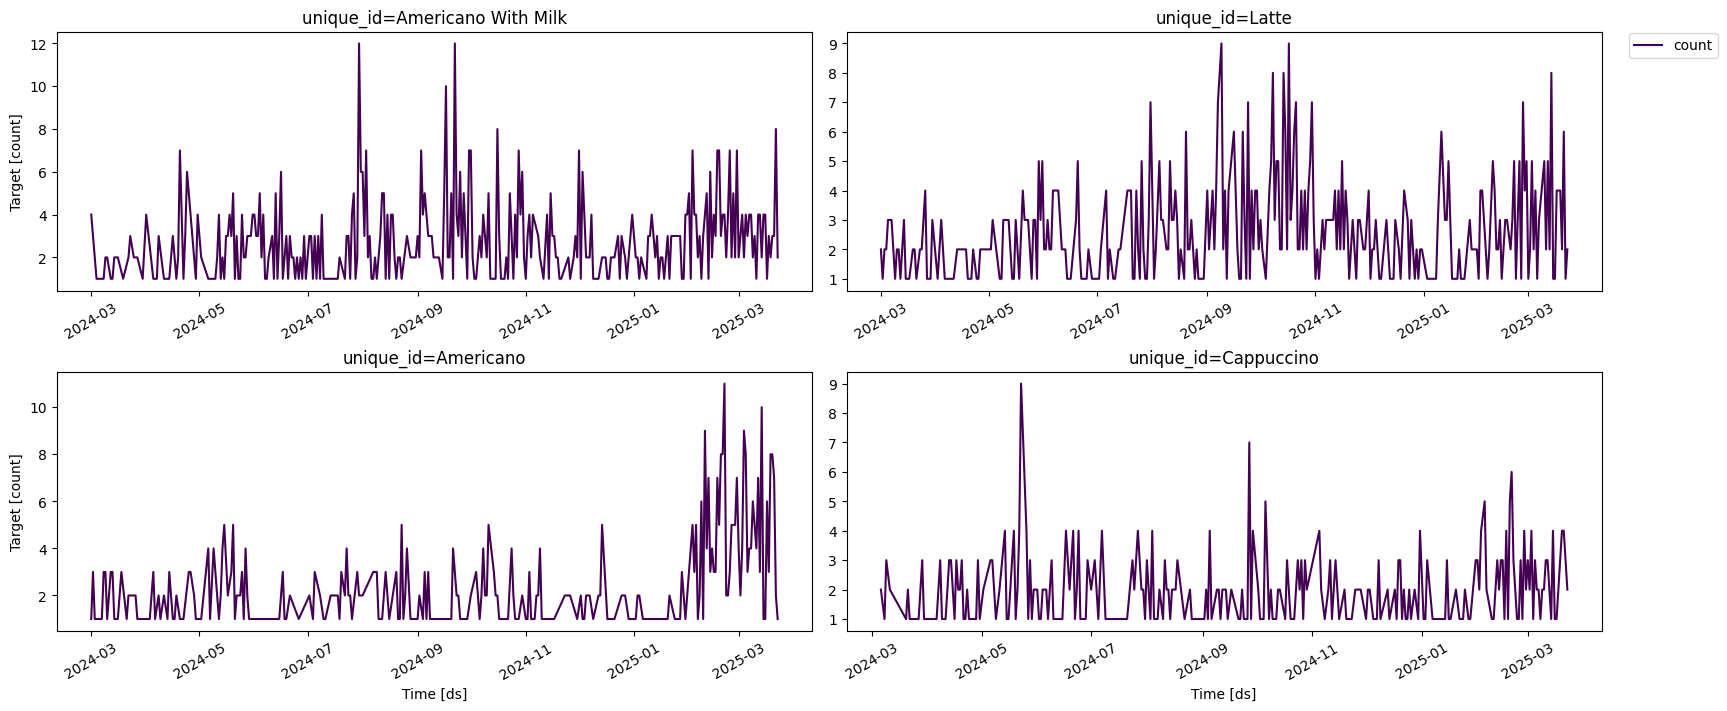

In [41]:
plot_series(df=dfGroup, ids=ids, target_col="count", palette="viridis")

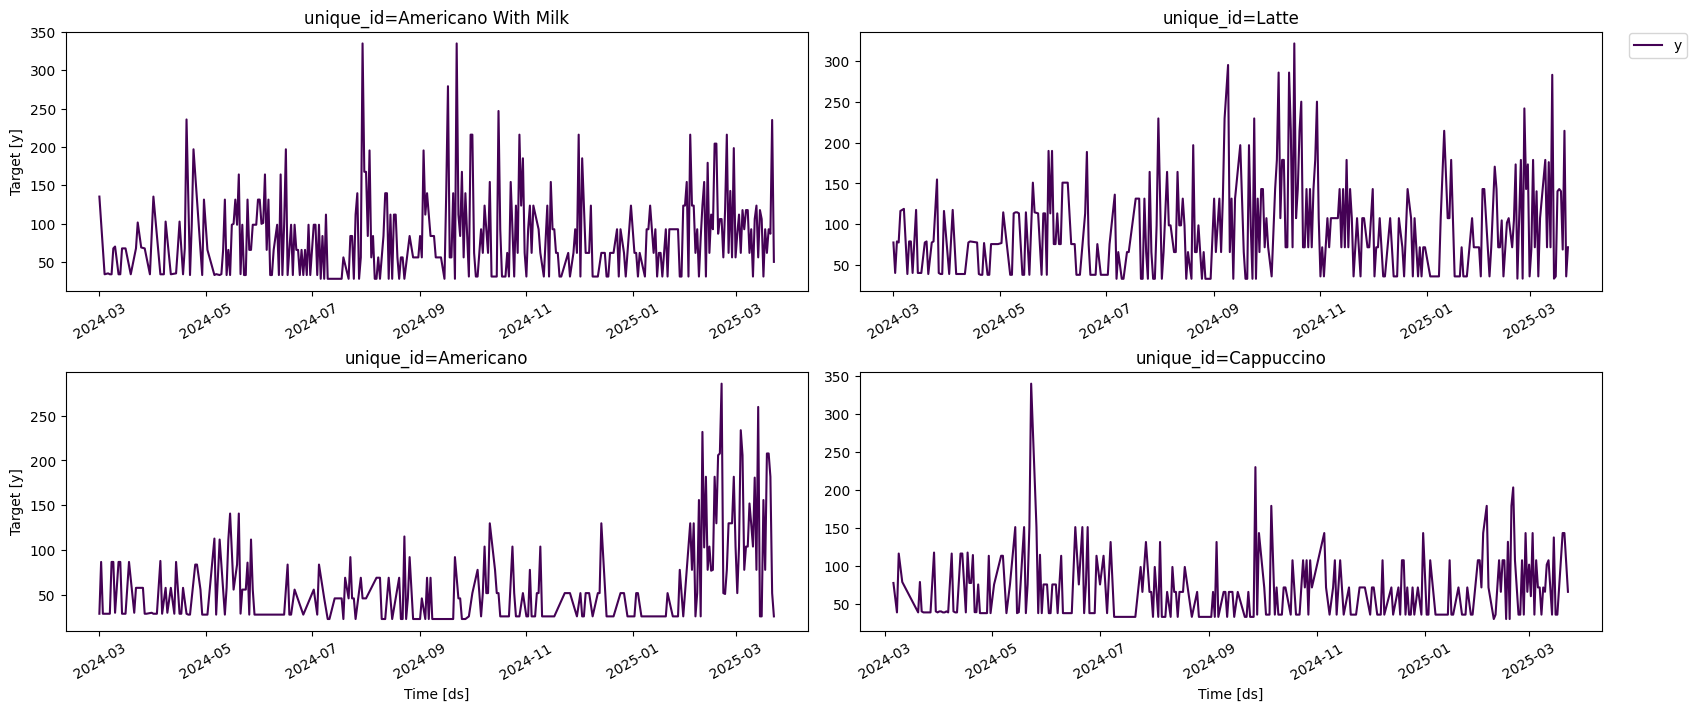

In [42]:
plot_series(df=dfGroup, ids=ids, palette="viridis")

In [43]:
horizon = 7

models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=horizon),
    SeasonalNaive(season_length=horizon)
]

sf = StatsForecast(models=models, freq="D")
sf.fit(df=dfGroup)
preds = sf.predict(h=horizon)

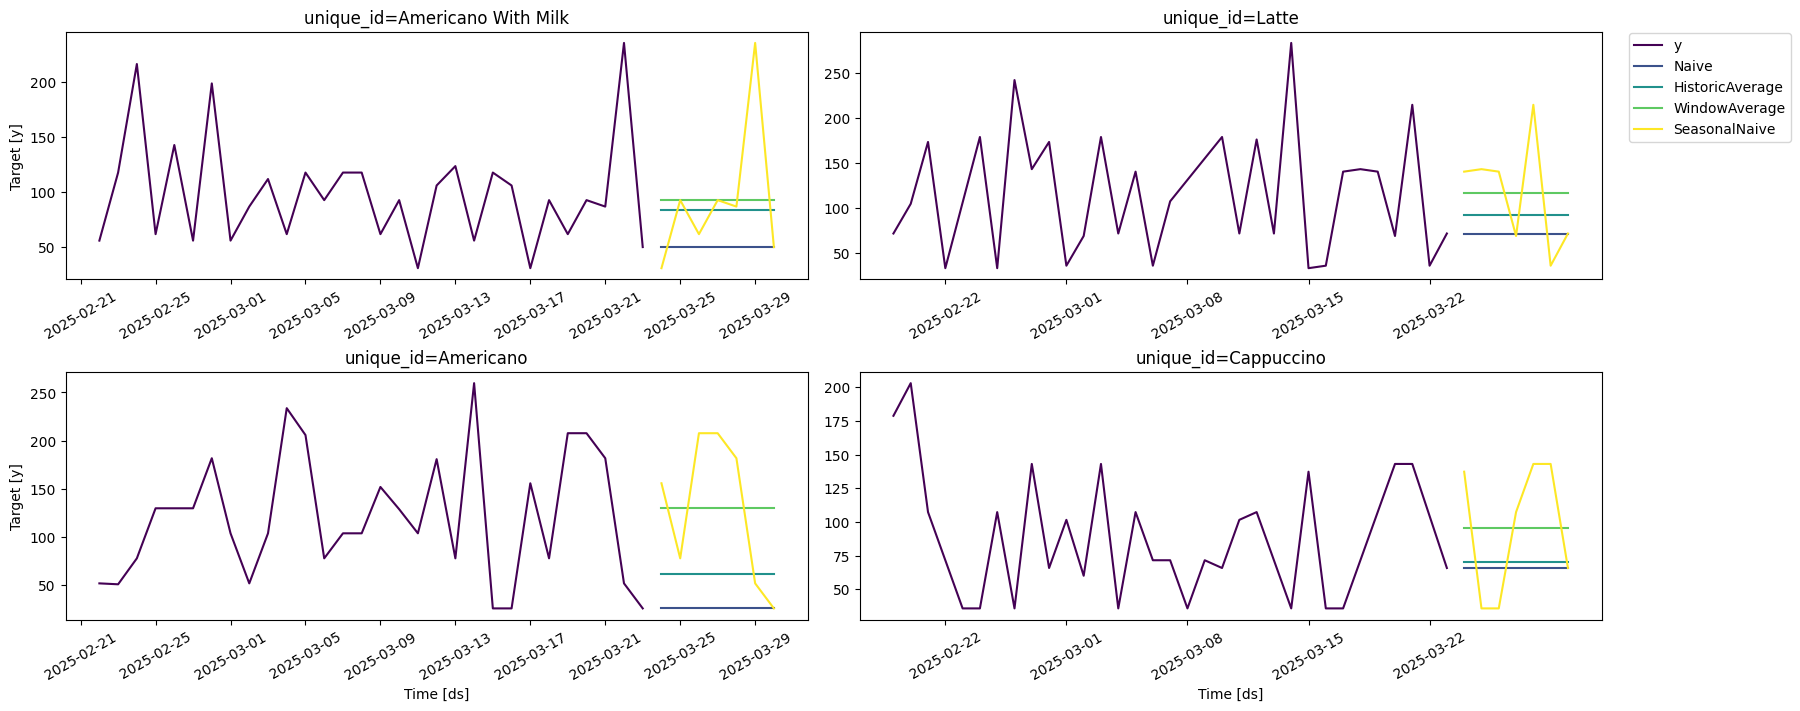

In [44]:
plot_series(df=dfGroup, forecasts_df=preds, ids=ids, max_insample_length=30, palette="viridis")

In [45]:
test = dfGroup.groupby("unique_id").tail(7)
train = dfGroup.drop(test.index).reset_index(drop=True)
train

,ds,unique_id,y,count
0,2024-03-01,Americano,28.90,1
1,2024-03-01,Americano With Milk,135.20,4
2,2024-03-01,Cocoa,38.70,1
3,2024-03-01,Hot Chocolate,116.10,3
4,2024-03-01,Latte,77.40,2
...,...,...,...,...
1664,2025-03-15,Americano With Milk,117.58,4
1665,2025-03-15,Latte,33.00,1
1666,2025-03-16,Americano,25.96,1
1667,2025-03-16,Americano With Milk,105.86,4


In [46]:
sf.fit(df=train)
preds = sf.predict(h=horizon)
eval_df = pd.merge(test, preds, "left", ["ds", "unique_id"])

In [47]:
evaluation = evaluate(eval_df, metrics=[mae]).drop(columns="count")
evaluation.head()

,unique_id,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,Americano,mae,103.840000,81.818949,68.912653,44.777143
1,Americano With Milk,mae,50.000000,40.213410,40.187347,57.534286
2,Cappuccino,mae,64.600000,53.462868,53.228571,57.680000
3,Cocoa,mae,35.760000,41.006866,43.422857,53.640000
4,Cortado,mae,17.306667,20.004378,21.015238,25.960000


In [48]:
evaluation = evaluation.drop(columns=["unique_id"]).groupby("metric").mean().reset_index()
evaluation

,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,mae,47.031786,39.919117,40.684592,41.310833


<Axes: >

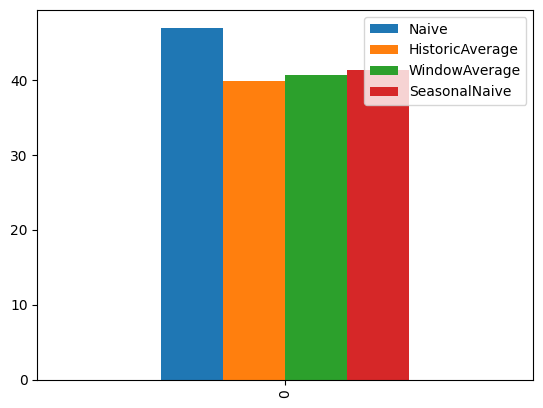

In [49]:
evaluation.plot(kind="bar")

In [50]:
models = {
    SeasonalNaive(season_length=7),
    AutoARIMA(seasonal=False, alias="ARIMA") ,
    AutoARIMA(season_length=7, alias="SARIMA")
}

sf = StatsForecast(models=models, freq="D")
cv_df = sf.cross_validation(df=dfGroup, h=horizon, n_windows=3, step_size=horizon, refit=True)

cv_df

,unique_id,ds,cutoff,y,ARIMA,SeasonalNaive,SARIMA
0,Americano,2025-03-03,2025-03-02,103.84,103.795283,77.88,103.795283
1,Americano,2025-03-04,2025-03-02,233.64,233.911684,129.80,233.911684
2,Americano,2025-03-05,2025-03-02,205.76,207.893874,129.80,207.893874
3,Americano,2025-03-06,2025-03-02,77.88,77.804826,129.80,77.804826
4,Americano,2025-03-07,2025-03-02,103.84,103.822636,181.72,103.822636
...,...,...,...,...,...,...,...
163,Latte,2025-03-19,2025-03-16,140.28,140.784159,176.04,140.784159
164,Latte,2025-03-20,2025-03-16,68.76,70.823130,71.52,70.823130
165,Latte,2025-03-21,2025-03-16,214.56,210.685368,283.32,210.685368
166,Latte,2025-03-22,2025-03-16,35.76,35.808754,33.00,35.808754


In [51]:
cv_eval = evaluate(cv_df.drop(columns="cutoff"), metrics=[mae])

cv_eval = cv_eval.drop(columns=["unique_id"]).groupby("metric").mean().reset_index()
cv_eval

,metric,ARIMA,SeasonalNaive,SARIMA
0,mae,1.385012,40.147738,1.364278


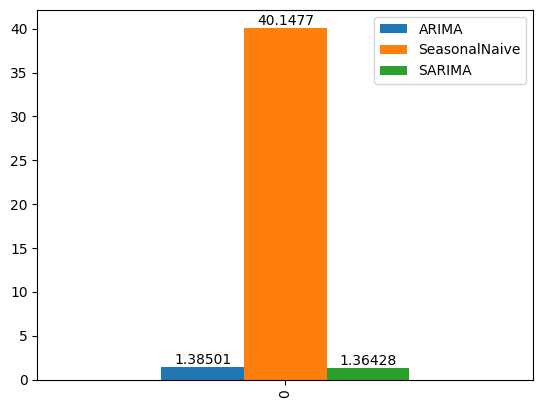

In [52]:
ax = cv_eval.plot(kind="bar")

for container in ax.containers:
    ax.bar_label(container)

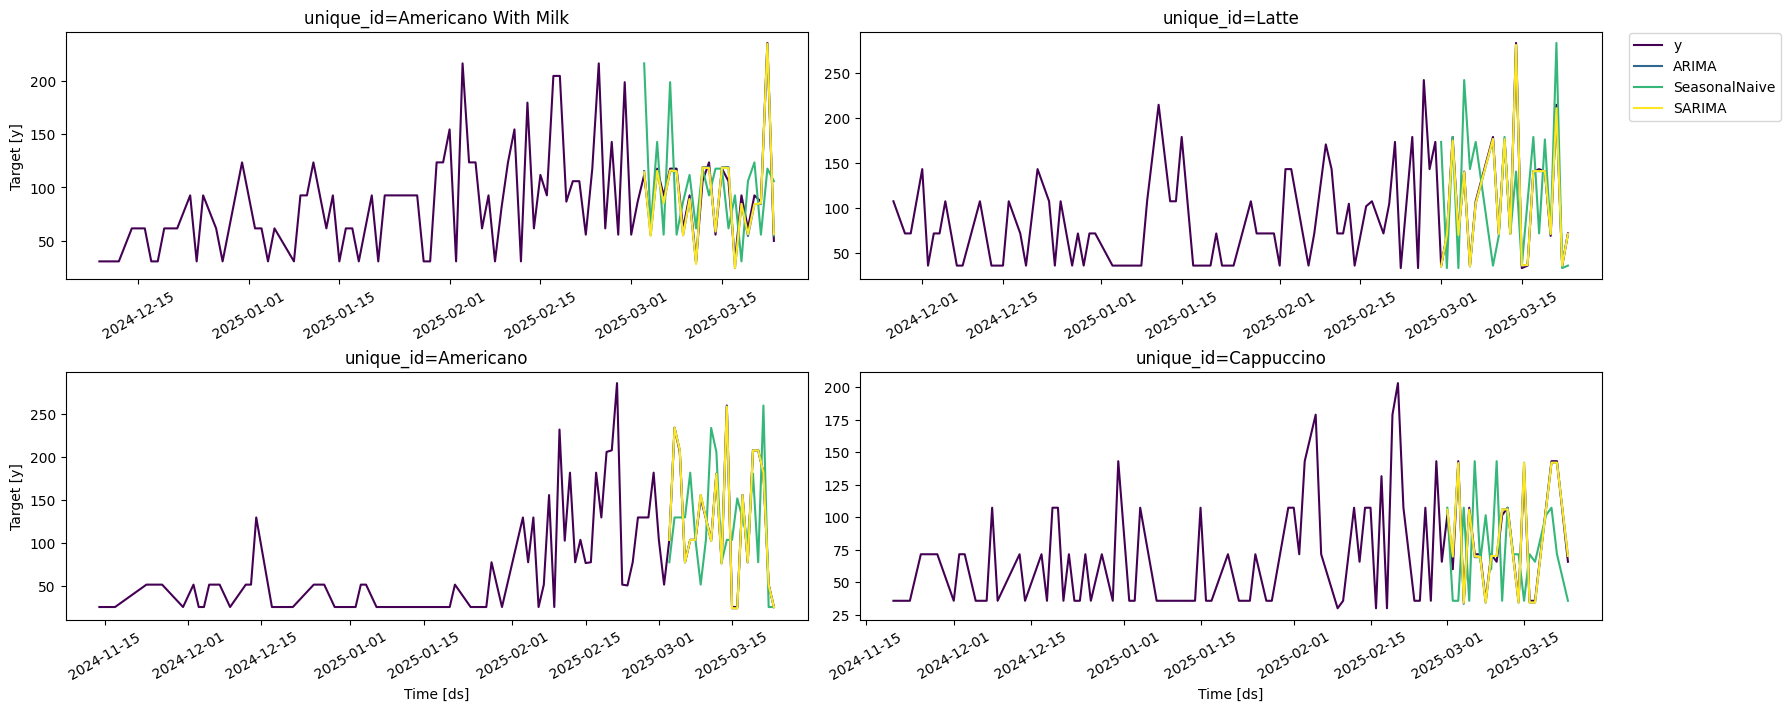

In [53]:
plot_series(df=dfGroup, forecasts_df=cv_df.drop(columns=["y", "cutoff"]), ids=ids, max_insample_length=90, palette="viridis")

In [75]:
ids = ["Americano With Milk", "Latte", "Americano"]

In [76]:
trainSmall = train.drop(columns="count")
trainSmall = trainSmall.loc[trainSmall["unique_id"].isin(ids)]
testSmall = test.drop(columns="count")
testSmall = testSmall.loc[testSmall["unique_id"].isin(ids)]

In [77]:
models = [
    LinearRegression(),
    lgb.LGBMRegressor(random_state=0),
]

fcst = MLForecast(models=models, freq="D", lags=[1, 5, 7])

fcst.fit(df=trainSmall)
predictions = fcst.predict(horizon)
predictions

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 834, number of used features: 3
[LightGBM] [Info] Start training from score 79.964340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

,unique_id,ds,LinearRegression,LGBMRegressor
0,Americano,2025-03-17,94.085069,115.863021
1,Americano,2025-03-18,86.047944,108.267489
2,Americano,2025-03-19,121.978382,99.924793
3,Americano,2025-03-20,78.803347,104.127213
4,Americano,2025-03-21,103.249113,89.581665
5,Americano,2025-03-22,76.373143,79.532785
6,Americano,2025-03-23,71.428870,70.133120
7,Americano With Milk,2025-03-17,89.557849,99.181201
8,Americano With Milk,2025-03-18,79.118667,92.583403
9,Americano With Milk,2025-03-19,81.308333,112.878052


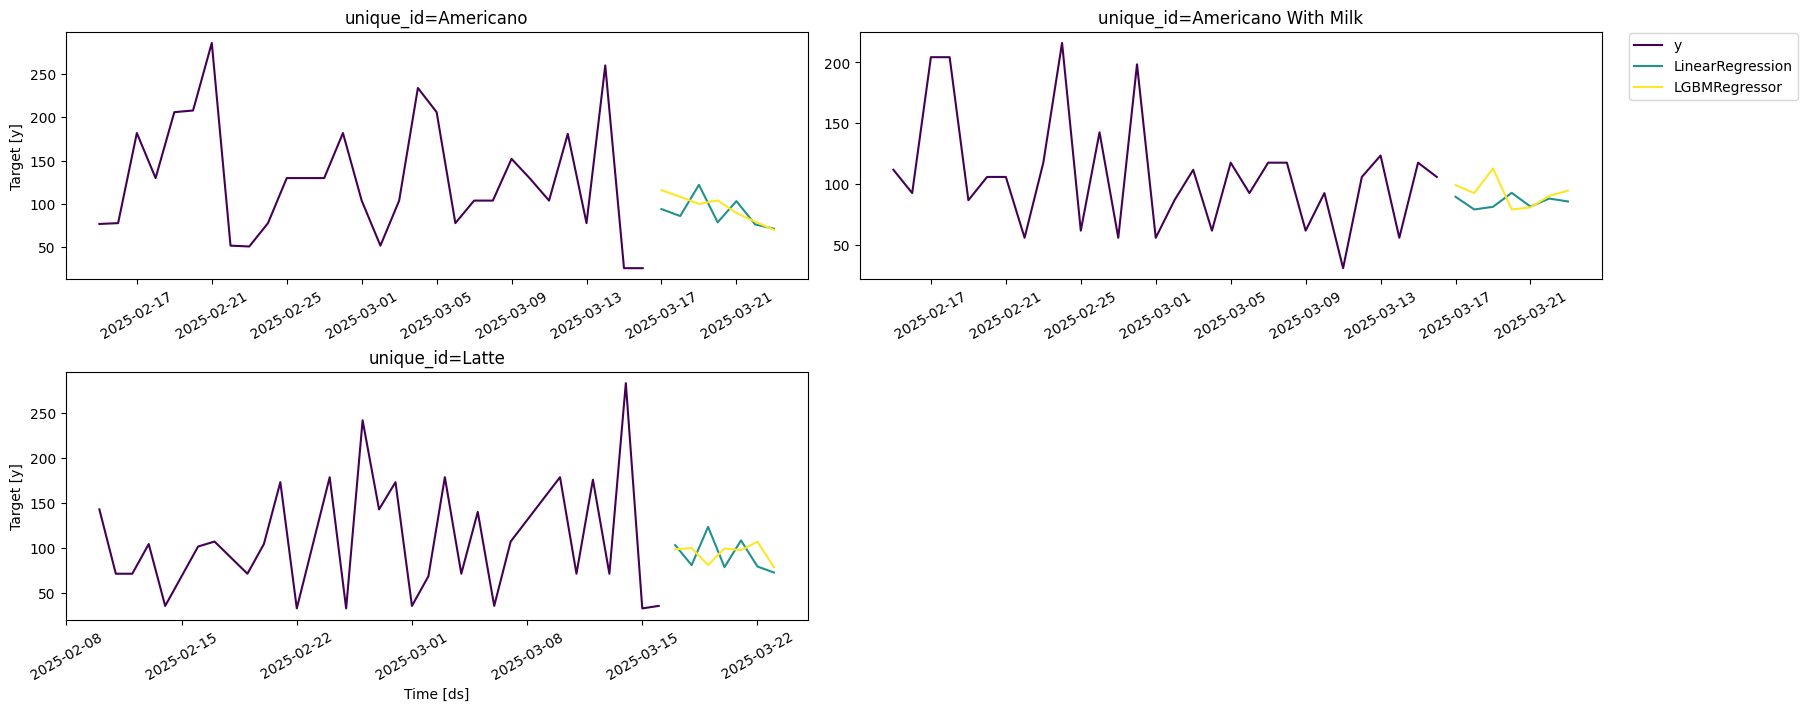

In [78]:
plot_series(df=trainSmall, forecasts_df=predictions, palette="viridis", max_insample_length=30)

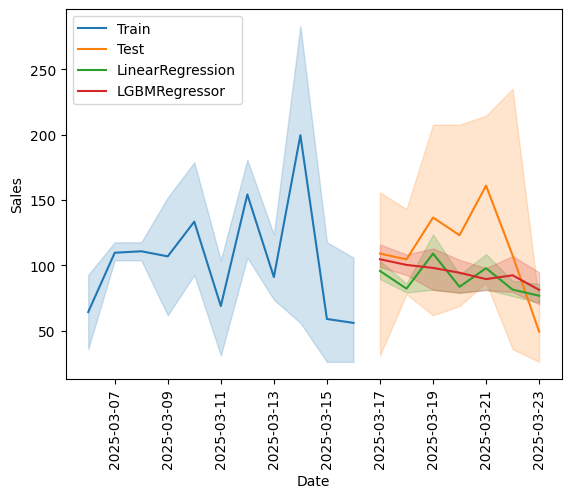

In [79]:
sns.lineplot(data=trainSmall[-30:], x="ds", y="y", label="Train")
sns.lineplot(data=testSmall, x="ds", y="y", label="Test")
sns.lineplot(data=predictions, x="ds", y="LinearRegression", label="LinearRegression")
sns.lineplot(data=predictions, x="ds", y="LGBMRegressor", label="LGBMRegressor")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [80]:
mergedPredictions = pd.merge(predictions, testSmall, on=["ds", "unique_id"], how="left")
mergedPredictions

,unique_id,ds,LinearRegression,LGBMRegressor,y
0,Americano,2025-03-17,94.085069,115.863021,155.76
1,Americano,2025-03-18,86.047944,108.267489,77.88
2,Americano,2025-03-19,121.978382,99.924793,207.68
3,Americano,2025-03-20,78.803347,104.127213,207.68
4,Americano,2025-03-21,103.249113,89.581665,181.72
5,Americano,2025-03-22,76.373143,79.532785,51.92
6,Americano,2025-03-23,71.428870,70.133120,25.96
7,Americano With Milk,2025-03-17,89.557849,99.181201,30.86
8,Americano With Milk,2025-03-18,79.118667,92.583403,92.58
9,Americano With Milk,2025-03-19,81.308333,112.878052,61.72


In [82]:
evalPredictions = evaluate(mergedPredictions, metrics=[mae])
evalPredictions

,unique_id,metric,LinearRegression,LGBMRegressor
0,Americano,mae,61.830578,63.645243
1,Americano With Milk,mae,39.992536,46.901111
2,Latte,mae,39.555745,52.851417


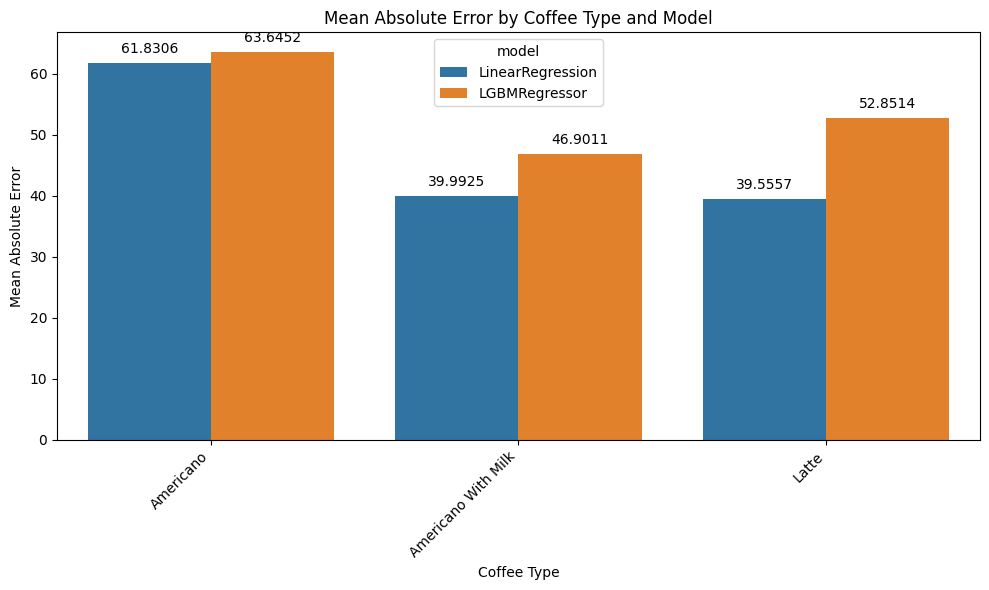

In [88]:
# Melt the DataFrame to have model names as a column for grouped bar plot
evalPredictions_melted = evalPredictions.melt(id_vars=["unique_id", "metric"], var_name="model", value_name="mae")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="unique_id", y="mae", hue="model", data=evalPredictions_melted)
plt.xlabel("Coffee Type")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error by Coffee Type and Model")
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, padding=5)
plt.tight_layout()
plt.show()